# 기존의 RK4와 Solve ivp 혹은 scipy ode와 속도 비교.

In [1]:
import numpy as np
from TO_sim.Integrator import RK4
from TO_sim.Kuramoto_model import *
from TO_sim.gen_Distribution import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint,solve_ivp
def Make_order_parameter(theta_s,N):
    rs = np.abs(np.sum(np.exp(1j*theta_s.T),axis=0))/N
    return rs

def Sol_Kuramoto_mf(N,K,m,tspan,p_theta = [], p_dtheta = [], p_omega = [],dt=0.01,mean=0, sigma =1,distribution = "Lorentzian",seed=None):
    if distribution == "Lorentzian":
        theta,omega,Kc = Lorentzian(N,mean,sigma,seed)
        dtheta  =  np.zeros(N)
    elif distribution == "Quantile Lorentzian":
        theta,omega,Kc = Quantile_Lorentzian(N,mean,sigma,seed)
        dtheta  =  np.zeros(N)
    elif distribution == "Quantile Normal":
        theta,omega,Kc = Quantile_Normal(N,mean,sigma,seed)
        dtheta  =  np.zeros(N)
    else:
        theta,omega,Kc = Normal(N,mean,sigma,seed)
        dtheta  =  np.zeros(N)
    
    if tuple(map(len,(p_theta,p_dtheta,p_omega)))==(0,0,0):
        pass
    else:
        theta, dtheta, omega  =  p_theta, p_dtheta,p_omega
            
    t = np.arange(tspan[0],tspan[1]+dt,dt)
    result = RK4(Kuramoto_2nd_mf,np.array([*theta,*dtheta]),t,args=(omega,N,m,K))
    theta_s = result[:,:N]
    dtheta_s = result[:,N:]
    rs = Make_order_parameter(theta_s,N)
    return theta_s,dtheta_s,omega,rs,t
 

In [40]:
N = 5000
theta_init, omega_init, Kc = Quantile_Lorentzian(N, 0, 1, seed='uniform')
dtheta_init = np.zeros(N)
K = 6
m = 0.95
t_end = 400
dt = 0.01
theta_s, dtheta_s, omega, rs, t = Sol_Kuramoto_mf(N,K,m,(0, t_end),dt=dt,
                p_theta=theta_init,
                p_dtheta=dtheta_init,
                p_omega=omega_init,
                distribution="Normal",
            )

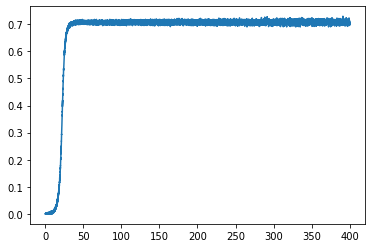

In [41]:
t_rk4,rs_rk4 = t,rs
plt.plot(t_rk4,rs_rk4)

In [43]:
# dt = 0.01
ts = np.arange(0,t_end +dt/2,dt)
func = lambda t,y,omega,N,m,K : Kuramoto_2nd_mf(t=t,Theta=y,omega=omega,N=N,m=m,K=K)
sol = solve_ivp(func,t_span=[0,t_end],y0=np.array([*theta_init,*dtheta_init]),args=(omega,N,m,K),t_eval=ts,method='RK45')#,rtol=1e-8)


result = sol.y.T
theta_s = result[:,:N]
dtheta_s = result[:,N:]
rs_solve_ivp = Make_order_parameter(theta_s,N)
# return theta_s,dtheta_s,omega,rs,t

In [30]:
# dt = 0.01
ts = np.arange(0,t_end +dt/2,dt)
func = lambda t,y,omega,N,m,K : Kuramoto_2nd_mf(t=t,Theta=y,omega=omega,N=N,m=m,K=K)
sol = odeint(Kuramoto_2nd_mf,y0=np.array([*theta_init,*dtheta_init]),t=ts,args=(omega,N,m,K),t_eval=ts)


result = sol.y.T
theta_s = result[:,:N]
dtheta_s = result[:,N:]
rs_odeint = Make_order_parameter(theta_s,N)
# return theta_s,dtheta_s,omega,rs,t

c:\Users\kim9y\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_ivp\common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `rabs`.
  warn("The following arguments have no effect for a chosen solver: {}."


Text(0.5, 1.0, 'm=0.95, N=5000,dt=0.01,$t_{end}$=400s')

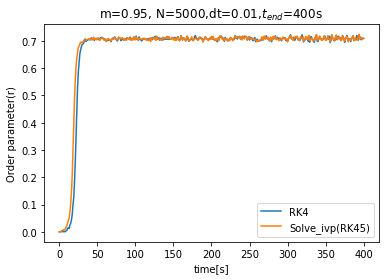

In [44]:
plt.plot(ts[::100],rs_rk4[::100])
plt.plot(ts[::100],rs_solve_ivp[::100])
# plt.plot(ts[::100],rs_odeint[::100])
plt.legend(['RK4','Solve_ivp(RK45)','odeint'])
plt.xlabel('time[s]')
plt.ylabel('Order parameter(r)')
plt.title(f'm={m}, N={N},dt={dt},'+r'$t_{end}$'+f'={t_end}s')

In [40]:
odeint(Kuramoto_2nd_mf,y0=np.array([*theta_init,*dtheta_init]),t=ts,args=(omega,N,m,K))

KeyboardInterrupt: 